In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import random
import heapq

np.random.seed(50)
source = 0

# Implement Dijkstra's Algorithm

## Using Adjacency Matrix
- Total O(V*V) = O(V^2) to remove minimum vertex
- Total O(V*V) = O(V^2) for relaxation operations
- Time Complexity = O(V^2)

In [2]:
def removeMin(priority_queue, min_dist):    # remove the vertex with the minimum distance
    min_vertex = priority_queue[0]
    for vertex in priority_queue:
        if min_dist[vertex] < min_dist[min_vertex]:
            min_vertex = vertex
    priority_queue.remove(min_vertex)
    return min_vertex

def dijkstraMatrix(graph, source, iterations):
    if source + 1 > len(graph):
        return []

    min_dist = [float('inf')] * len(graph)
    min_dist[source] = 0
    previous = [-1] * len(graph)
    visited = [0] * len(graph)
    priority_queue = [i for i in range(len(graph))]

    while len(priority_queue):
        current = removeMin(priority_queue, min_dist)    # expand node with min dist to source
        if visited[current]:
            continue
        visited[current] = 1

        for i in range(len(graph)):
            iterations[0] += 1
            if graph[current][i] and not visited[i] and (graph[current][i] + min_dist[current] < min_dist[i]):    # if adj node has not been visited and is cheaper, update min dist and previous
                min_dist[i] = graph[current][i] + min_dist[current]
                previous[i] = current
    return min_dist, previous

## Using Adjacency List
- Total O(V logV) to remove minimum vertex from heap
- Total O(E logV) to update heap and minimum vertex
- Time Complexity = O((V + E) logV)
- If E much larger than V, then Time Complexity approximates to O(E logV)

In [3]:
def dijkstraList(graph, source, iterations):
    if source >= len(graph):
        return [], []

    min_dist = [float('inf')] * len(graph)
    min_dist[source] = 0
    previous = [-1] * len(graph)
    visited = [0] * len(graph)
    
    priority_queue = [(float('inf'), i) for i in range(len(graph))]  # Priority queue with (distance, vertex) tuples, done with heapq
    priority_queue[source] = (0, source)

    while priority_queue:
        dist, current = heapq.heappop(priority_queue)
        if visited[current]:
            continue
        visited[current] = 1

        for neighbor, weight in graph[current]:
            iterations[0] += 1
            if not visited[neighbor] and (dist + weight < min_dist[neighbor]):
                min_dist[neighbor] = dist + weight
                previous[neighbor] = current
                heapq.heappush(priority_queue, (min_dist[neighbor], neighbor))

    return min_dist, previous

# Generate Input Graphs

In [4]:
def getEdge(vertices):
    vertex1 = random.randint(0, vertices - 1)
    vertex2 = random.randint(0, vertices - 1)
    while vertex2 == vertex1:
        vertex2 = random.randint(0, vertices - 1)
    return vertex1, vertex2

def getGraph(vertices, edges):
    if edges > (vertices - 1) * vertices:
        return []

    adj_matrix = [[0 for _ in range(vertices)] for _ in range(vertices)]
    adj_list = [[] for _ in range(vertices)]

    if edges:
        for _ in range(edges):
            vertex1, vertex2 = getEdge(vertices)
            while adj_matrix[vertex1][vertex2]:
                vertex1, vertex2 = getEdge(vertices)
            weight = random.randint(1, 20)
            adj_matrix[vertex1][vertex2] = weight
            adj_list[vertex1].append((vertex2, weight))

    return adj_matrix, adj_list

# Compare Performance

In [5]:
def plotResults(results1, results2, xlabel, title):
    fig, (ax1, ax2) = plt.subplots(
        figsize=(20, 7),
        ncols=2
    )

    elements = [item for item in results1]
    iterations1 = [results1[item]['iterations'] for item in results1]
    iterations2 = [results2[item]['iterations'] for item in results2]
    runtime1 = [results1[item]['runtime'] for item in results1]
    runtime2 = [results2[item]['runtime'] for item in results2]

    ax1.plot(elements, iterations1, label='Adjacency Matrix')
    ax1.plot(elements, iterations2, label='Adjacency List')
    ax1.set_title(f'Number of Iterations against {xlabel}')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel('Number of Iterations')
    ax1.legend()

    ax2.plot(elements, runtime1, label='Adjacency Matrix')
    ax2.plot(elements, runtime2, label='Adjacency List')
    ax2.set_title(f'Algorithm Runtime against {xlabel}')
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel('Algorithm Runtime (s)')
    ax2.legend()

    plt.suptitle(title)
    plt.tight_layout()

    return fig, (ax1, ax2)

In [6]:
graph_qty = 20
graph_vertices = np.linspace(100, 3000, graph_qty).astype(int)
graph_vertices

array([ 100,  252,  405,  557,  710,  863, 1015, 1168, 1321, 1473, 1626,
       1778, 1931, 2084, 2236, 2389, 2542, 2694, 2847, 3000])

##  Varying Number of Vertices and 50% Number of Edges (Average Case)

In [7]:
avg_adj_matrix_results = {}
avg_adj_list_results = {}

for item in graph_vertices:
    adj_matrix, adj_list = getGraph(item, item * (item - 1) // 2)

    iterations = [0]
    start_time = dt.datetime.now()
    dijkstraMatrix(adj_matrix, source, iterations)
    end_time = dt.datetime.now()
    avg_adj_matrix_results[item] = {
        'iterations': iterations[0],
        'runtime': (end_time - start_time).total_seconds()
    }
    print(f'Searched adjacency matrix with {item} vertices in {avg_adj_matrix_results[item]["runtime"]}s')

    iterations = [0]
    start_time = dt.datetime.now()
    dijkstraList(adj_list, source, iterations)
    end_time = dt.datetime.now()
    avg_adj_list_results[item] = {
        'iterations': iterations[0],
        'runtime': (end_time - start_time).total_seconds()
    }
    print(f'Searched adjacency list with {item} vertices in {avg_adj_list_results[item]["runtime"]}s')

Searched adjacency matrix with 100 vertices in 0.00123s
Searched adjacency list with 100 vertices in 0.001186s
Searched adjacency matrix with 252 vertices in 0.008081s
Searched adjacency list with 252 vertices in 0.00747s
Searched adjacency matrix with 405 vertices in 0.02011s
Searched adjacency list with 405 vertices in 0.018913s
Searched adjacency matrix with 557 vertices in 0.033023s
Searched adjacency list with 557 vertices in 0.041361s
Searched adjacency matrix with 710 vertices in 0.05807s
Searched adjacency list with 710 vertices in 0.066477s
Searched adjacency matrix with 863 vertices in 0.081726s
Searched adjacency list with 863 vertices in 0.106033s
Searched adjacency matrix with 1015 vertices in 0.111091s
Searched adjacency list with 1015 vertices in 0.154383s
Searched adjacency matrix with 1168 vertices in 0.152056s
Searched adjacency list with 1168 vertices in 0.214509s
Searched adjacency matrix with 1321 vertices in 0.19058s
Searched adjacency list with 1321 vertices in 0

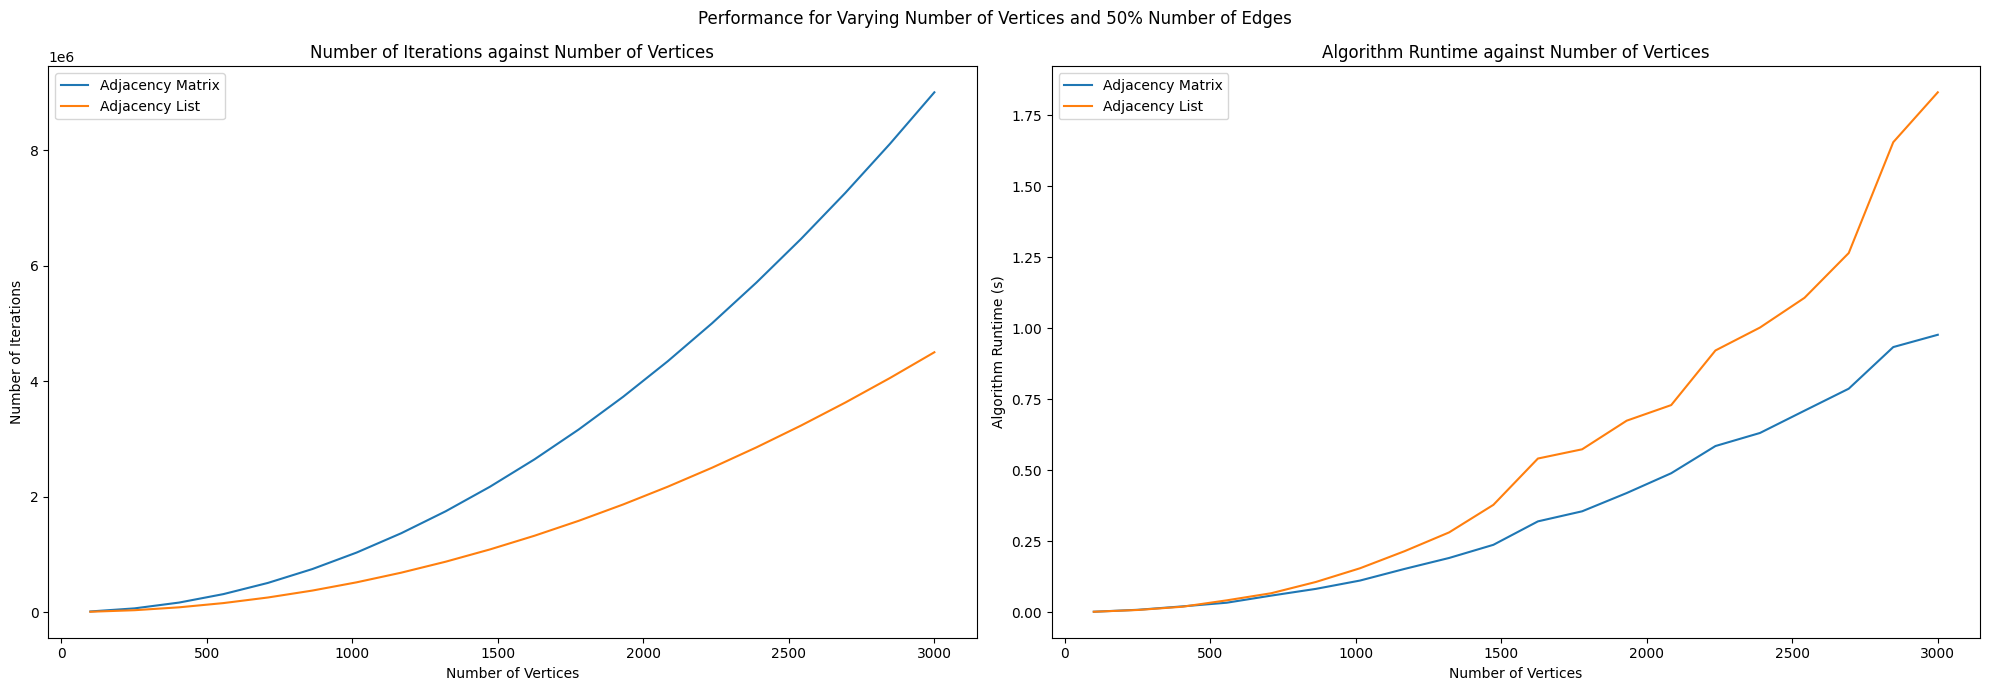

In [17]:
plotResults(avg_adj_matrix_results, avg_adj_list_results, 'Number of Vertices', 'Performance for Varying Number of Vertices and 50% Number of Edges');

##  Varying Number of Vertices and Maximum Number of Edges (Worst-Case)

In [10]:
max_adj_matrix_results = {}
max_adj_list_results = {}

for item in graph_vertices:
    adj_matrix, adj_list = getGraph(item, item * (item - 1))

    iterations = [0]
    start_time = dt.datetime.now()
    dijkstraMatrix(adj_matrix, source, iterations)
    end_time = dt.datetime.now()
    max_adj_matrix_results[item] = {
        'iterations': iterations[0],
        'runtime': (end_time - start_time).total_seconds()
    }
    print(f'Searched adjacency matrix with {item} vertices in {max_adj_matrix_results[item]["runtime"]}s')

    iterations = [0]
    start_time = dt.datetime.now()
    dijkstraList(adj_list, source, iterations)
    end_time = dt.datetime.now()
    max_adj_list_results[item] = {
        'iterations': iterations[0],
        'runtime': (end_time - start_time).total_seconds()
    }
    print(f'Searched adjacency list with {item} vertices in {max_adj_list_results[item]["runtime"]}s')

Searched adjacency matrix with 100 vertices in 0.001477s
Searched adjacency list with 100 vertices in 0.002291s
Searched adjacency matrix with 252 vertices in 0.007706s
Searched adjacency list with 252 vertices in 0.013516s
Searched adjacency matrix with 405 vertices in 0.019647s
Searched adjacency list with 405 vertices in 0.044705s
Searched adjacency matrix with 557 vertices in 0.039094s
Searched adjacency list with 557 vertices in 0.082281s
Searched adjacency matrix with 710 vertices in 0.062325s
Searched adjacency list with 710 vertices in 0.151719s
Searched adjacency matrix with 863 vertices in 0.09044s
Searched adjacency list with 863 vertices in 0.229189s
Searched adjacency matrix with 1015 vertices in 0.126438s
Searched adjacency list with 1015 vertices in 0.320611s
Searched adjacency matrix with 1168 vertices in 0.159651s
Searched adjacency list with 1168 vertices in 0.407346s
Searched adjacency matrix with 1321 vertices in 0.217937s
Searched adjacency list with 1321 vertices 

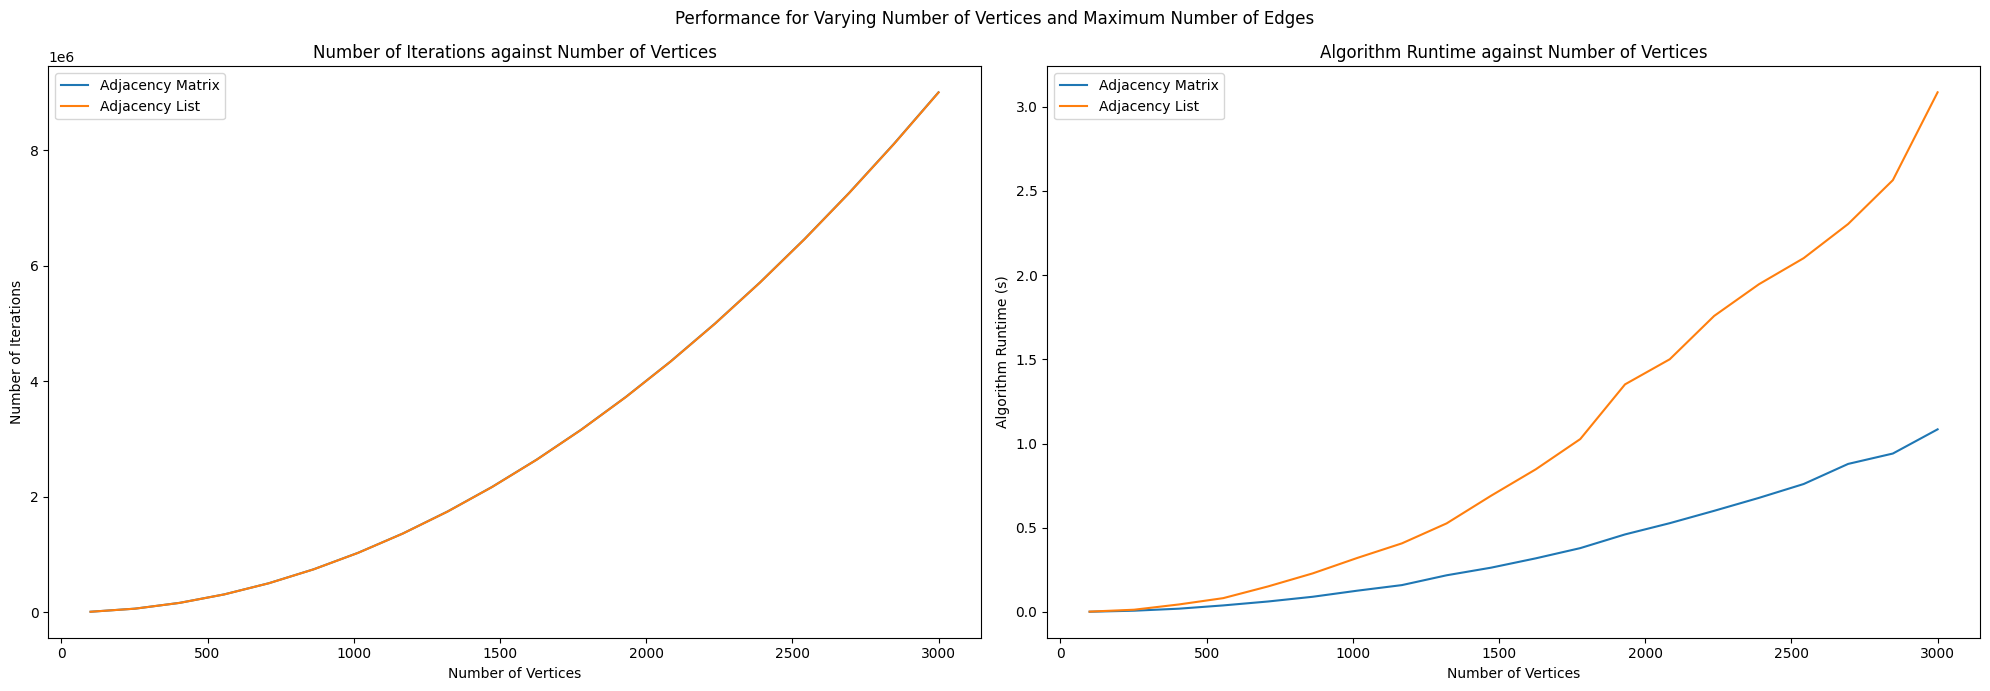

In [42]:
plotResults(max_adj_matrix_results, max_adj_list_results, 'Number of Vertices', 'Performance for Varying Number of Vertices and Maximum Number of Edges');

## Fixed Number of Vertices and Varying Number of Edges

In [32]:
def getIntersection(elements1, bestFitTime1, elements2, bestFitTime2):    # Interpolate the best fit lines
    f1 = interp1d(elements1, bestFitTime1(elements1), kind='cubic')
    f2 = interp1d(elements2, bestFitTime2(elements2), kind='cubic')

    intersection_x = np.linspace(max(min(elements1), min(elements2)), min(max(elements1), max(elements2)), 1000)     # Find the intersection point using NumPy functions
    intersection_y1 = f1(intersection_x)
    intersection_y2 = f2(intersection_x)

    intersection_points = intersection_x[np.where(np.abs(intersection_y1 - intersection_y2) == np.min(np.abs(intersection_y1 - intersection_y2)))]     # Find the intersection point(s)

    if len(intersection_points) > 0:
        smallest_intersection_point = int(np.min(np.ceil(intersection_points)))
    else:
        smallest_intersection_point = None

    return smallest_intersection_point

In [33]:
def plotComparisons(results1, results2, xlabel, title, degree1, degree2):
    fig, (ax1, ax2) = plt.subplots(
        figsize=(20, 7),
        ncols=2
    )

    bestFitX = np.linspace(1, list(results1.keys())[-1])
    elements = [item for item in results1]
    iterations1 = [results1[item]['iterations'] for item in results1]
    iterations2 = [results2[item]['iterations'] for item in results2]
    runtime1 = [results1[item]['runtime'] for item in results1]
    bestFitTime1 = np.poly1d(np.polyfit(elements, runtime1, degree1))
    runtime2 = [results2[item]['runtime'] for item in results2]
    bestFitTime2 = np.poly1d(np.polyfit(elements, runtime2, degree2))

    ax1.plot(elements, iterations1, label='Adjacency Matrix')
    ax1.plot(elements, iterations2, label='Adjacency List')
    ax1.set_title(f'Number of Iterations against {xlabel}')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel('Number of Iterations')
    ax1.legend()

    ax2.plot(elements, runtime1, label='Actual Adjacency Matrix')
    ax2.plot(bestFitX, bestFitTime1(bestFitX), label='Best Fit Adjacency Matrix')
    ax2.plot(elements, runtime2, label='Actual Adjacency List')
    ax2.plot(bestFitX, bestFitTime2(bestFitX), label='Best Fit Adjacency List')
    ax2.set_title(f'Algorithm Runtime against {xlabel}')
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel('Algorithm Runtime (s)')
    ax2.legend()

    plt.suptitle(title)
    plt.tight_layout()
    intersection = getIntersection(elements, bestFitTime1, elements, bestFitTime2)

    print(f'Intersection = {intersection} Vertices')
    print(f'Proportion = {intersection / elements[-1]}')

    return fig, (ax1, ax2)

### 3000 Vertices

In [45]:
graph_qty = 20
graph_vertices = 3000
max_edges = graph_vertices * (graph_vertices - 1)
graph_edges = np.linspace(graph_vertices, max_edges, graph_qty).astype(int)
graph_edges

array([   3000,  476368,  949736, 1423105, 1896473, 2369842, 2843210,
       3316578, 3789947, 4263315, 4736684, 5210052, 5683421, 6156789,
       6630157, 7103526, 7576894, 8050263, 8523631, 8997000])

In [35]:
edges_3000_adj_matrix_results = {}
edges_3000_adj_list_results = {}

for item in graph_edges:
    adj_matrix, adj_list = getGraph(graph_vertices, item)

    iterations = [0]
    start_time = dt.datetime.now()
    dijkstraMatrix(adj_matrix, source, iterations)
    end_time = dt.datetime.now()
    edges_3000_adj_matrix_results[item] = {
        'iterations': iterations[0],
        'runtime': (end_time - start_time).total_seconds()
    }
    print(f'Searched adjacency matrix with {item} edges in {edges_3000_adj_matrix_results[item]["runtime"]}s')

    iterations = [0]
    start_time = dt.datetime.now()
    dijkstraList(adj_list, source, iterations)
    end_time = dt.datetime.now()
    edges_3000_adj_list_results[item] = {
        'iterations': iterations[0],
        'runtime': (end_time - start_time).total_seconds()
    }
    print(f'Searched adjacency list with {item} edges in {edges_3000_adj_list_results[item]["runtime"]}s')

Searched adjacency matrix with 3000 edges in 0.763449s
Searched adjacency list with 3000 edges in 0.003997s
Searched adjacency matrix with 476368 edges in 0.823251s
Searched adjacency list with 476368 edges in 0.186984s
Searched adjacency matrix with 949736 edges in 0.844014s
Searched adjacency list with 949736 edges in 0.379763s
Searched adjacency matrix with 1423105 edges in 0.871811s
Searched adjacency list with 1423105 edges in 0.529105s
Searched adjacency matrix with 1896473 edges in 0.867877s
Searched adjacency list with 1896473 edges in 0.718565s
Searched adjacency matrix with 2369842 edges in 0.890585s
Searched adjacency list with 2369842 edges in 0.877662s
Searched adjacency matrix with 2843210 edges in 0.89982s
Searched adjacency list with 2843210 edges in 0.953459s
Searched adjacency matrix with 3316578 edges in 0.936257s
Searched adjacency list with 3316578 edges in 1.13297s
Searched adjacency matrix with 3789947 edges in 1.14485s
Searched adjacency list with 3789947 edges 

Intersection = 2667889 Vertices
Proportion = 0.2965309547626987


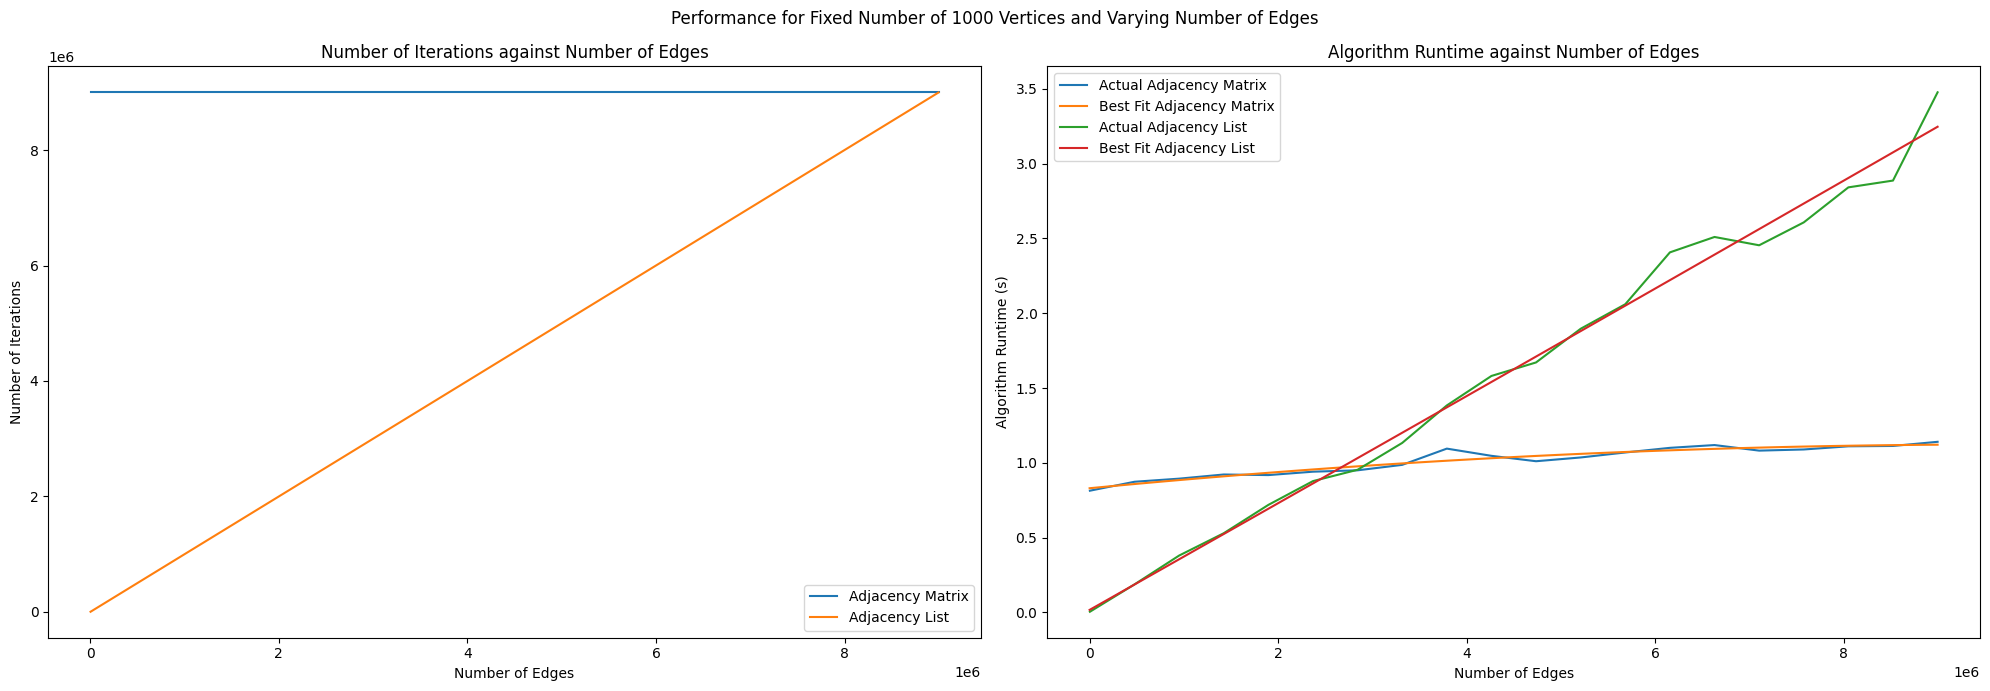

In [73]:
fig_3000, (ax1_3000, ax2_3000) = plotComparisons(edges_3000_adj_matrix_results, edges_3000_adj_list_results, 'Number of Edges', f'Performance for Fixed Number of {graph_vertices} Vertices and Varying Number of Edges', 2, 2);

### 2000 Vertices

In [47]:
graph_vertices = 2000
max_edges = graph_vertices * (graph_vertices - 1)
graph_edges = np.linspace(graph_vertices, max_edges, graph_qty).astype(int)
graph_edges

array([   2000,  212315,  422631,  632947,  843263, 1053578, 1263894,
       1474210, 1684526, 1894842, 2105157, 2315473, 2525789, 2736105,
       2946421, 3156736, 3367052, 3577368, 3787684, 3998000])

In [48]:
edges_2000_adj_matrix_results = {}
edges_2000_adj_list_results = {}

for item in graph_edges:
    adj_matrix, adj_list = getGraph(graph_vertices, item)

    iterations = [0]
    start_time = dt.datetime.now()
    dijkstraMatrix(adj_matrix, source, iterations)
    end_time = dt.datetime.now()
    edges_2000_adj_matrix_results[item] = {
        'iterations': iterations[0],
        'runtime': (end_time - start_time).total_seconds()
    }
    print(f'Searched adjacency matrix with {item} edges in {edges_2000_adj_matrix_results[item]["runtime"]}s')

    iterations = [0]
    start_time = dt.datetime.now()
    dijkstraList(adj_list, source, iterations)
    end_time = dt.datetime.now()
    edges_2000_adj_list_results[item] = {
        'iterations': iterations[0],
        'runtime': (end_time - start_time).total_seconds()
    }
    print(f'Searched adjacency list with {item} edges in {edges_2000_adj_list_results[item]["runtime"]}s')

Searched adjacency matrix with 2000 edges in 0.336041s
Searched adjacency list with 2000 edges in 0.004128s
Searched adjacency matrix with 212315 edges in 0.373816s
Searched adjacency list with 212315 edges in 0.074128s
Searched adjacency matrix with 422631 edges in 0.423734s
Searched adjacency list with 422631 edges in 0.16079s
Searched adjacency matrix with 632947 edges in 0.389511s
Searched adjacency list with 632947 edges in 0.208427s
Searched adjacency matrix with 843263 edges in 0.407896s
Searched adjacency list with 843263 edges in 0.313175s
Searched adjacency matrix with 1053578 edges in 0.400312s
Searched adjacency list with 1053578 edges in 0.375976s
Searched adjacency matrix with 1263894 edges in 0.410497s
Searched adjacency list with 1263894 edges in 0.428765s
Searched adjacency matrix with 1474210 edges in 0.44926s
Searched adjacency list with 1474210 edges in 0.582196s
Searched adjacency matrix with 1684526 edges in 0.429625s
Searched adjacency list with 1684526 edges in 

Intersection = 1182000 Vertices
Proportion = 0.295647823911956


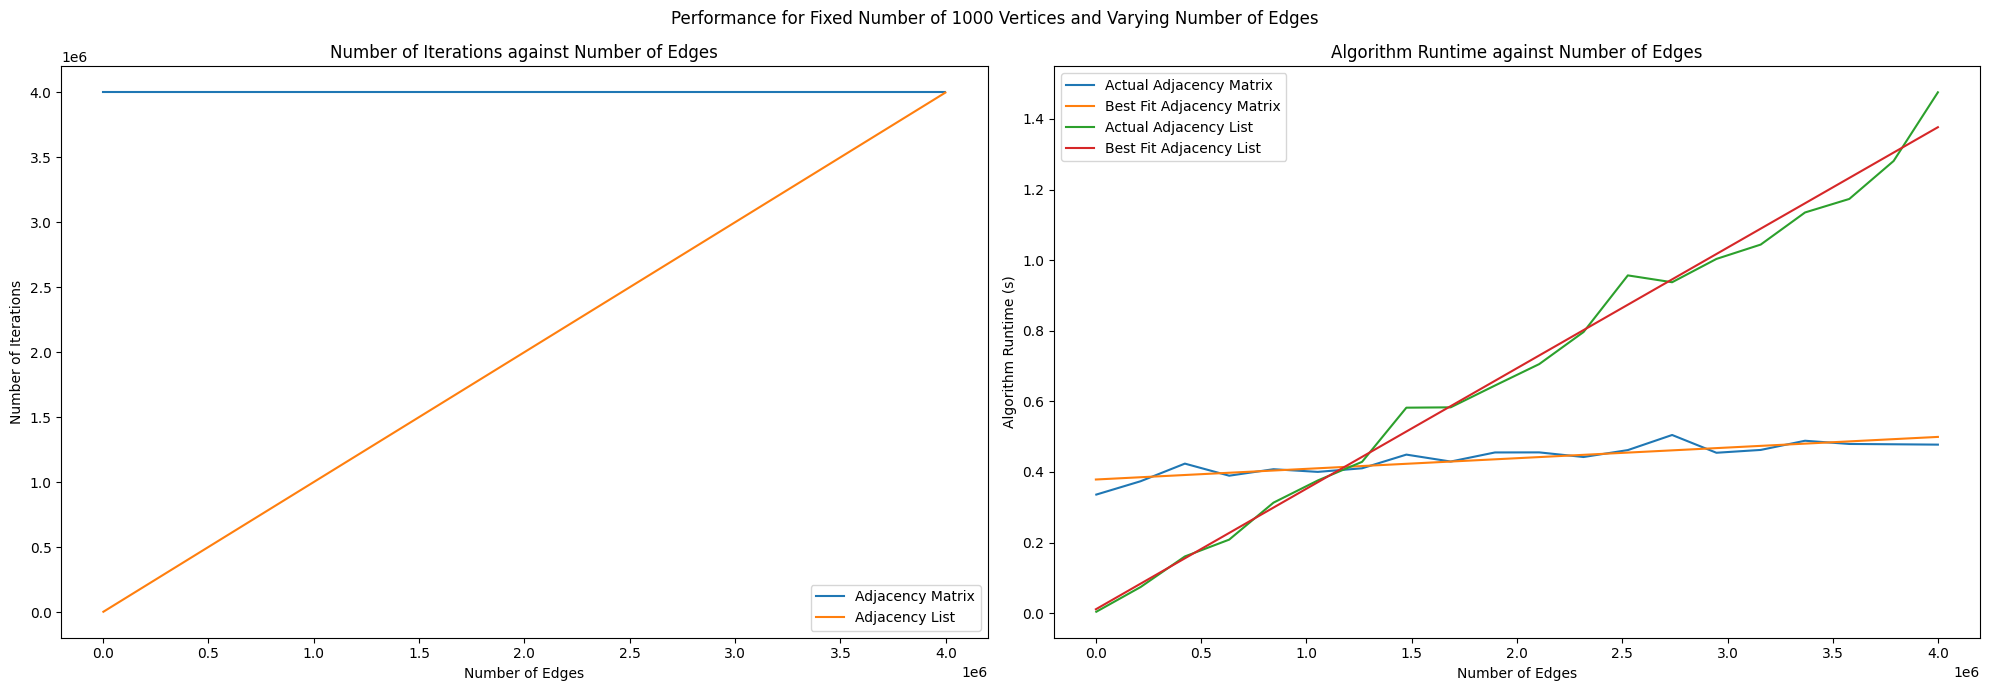

In [69]:
fig_2000, (ax1_2000, ax2_2000) = plotComparisons(edges_2000_adj_matrix_results, edges_2000_adj_list_results, 'Number of Edges', f'Performance for Fixed Number of {graph_vertices} Vertices and Varying Number of Edges', 1, 1);

### 1000 Vertices

In [67]:
graph_vertices = 1000
max_edges = graph_vertices * (graph_vertices - 1)
graph_edges = np.linspace(graph_vertices, max_edges, graph_qty).astype(int)
graph_edges

array([  1000,  53526, 106052, 158578, 211105, 263631, 316157, 368684,
       421210, 473736, 526263, 578789, 631315, 683842, 736368, 788894,
       841421, 893947, 946473, 999000])

In [68]:
edges_1000_adj_matrix_results = {}
edges_1000_adj_list_results = {}

for item in graph_edges:
    adj_matrix, adj_list = getGraph(graph_vertices, item)

    iterations = [0]
    start_time = dt.datetime.now()
    dijkstraMatrix(adj_matrix, source, iterations)
    end_time = dt.datetime.now()
    edges_1000_adj_matrix_results[item] = {
        'iterations': iterations[0],
        'runtime': (end_time - start_time).total_seconds()
    }
    print(f'Searched adjacency matrix with {item} edges in {edges_1000_adj_matrix_results[item]["runtime"]}s')

    iterations = [0]
    start_time = dt.datetime.now()
    dijkstraList(adj_list, source, iterations)
    end_time = dt.datetime.now()
    edges_1000_adj_list_results[item] = {
        'iterations': iterations[0],
        'runtime': (end_time - start_time).total_seconds()
    }
    print(f'Searched adjacency list with {item} edges in {edges_1000_adj_list_results[item]["runtime"]}s')

Searched adjacency matrix with 1000 edges in 0.085932s
Searched adjacency list with 1000 edges in 0.002492s
Searched adjacency matrix with 53526 edges in 0.089022s
Searched adjacency list with 53526 edges in 0.022753s
Searched adjacency matrix with 106052 edges in 0.092169s
Searched adjacency list with 106052 edges in 0.036125s
Searched adjacency matrix with 158578 edges in 0.09475s
Searched adjacency list with 158578 edges in 0.052896s
Searched adjacency matrix with 211105 edges in 0.112586s
Searched adjacency list with 211105 edges in 0.067172s
Searched adjacency matrix with 263631 edges in 0.098148s
Searched adjacency list with 263631 edges in 0.091154s
Searched adjacency matrix with 316157 edges in 0.10334s
Searched adjacency list with 316157 edges in 0.102398s
Searched adjacency matrix with 368684 edges in 0.103602s
Searched adjacency list with 368684 edges in 0.111212s
Searched adjacency matrix with 421210 edges in 0.104378s
Searched adjacency list with 421210 edges in 0.151125s


Intersection = 299701 Vertices
Proportion = 0.300001001001001


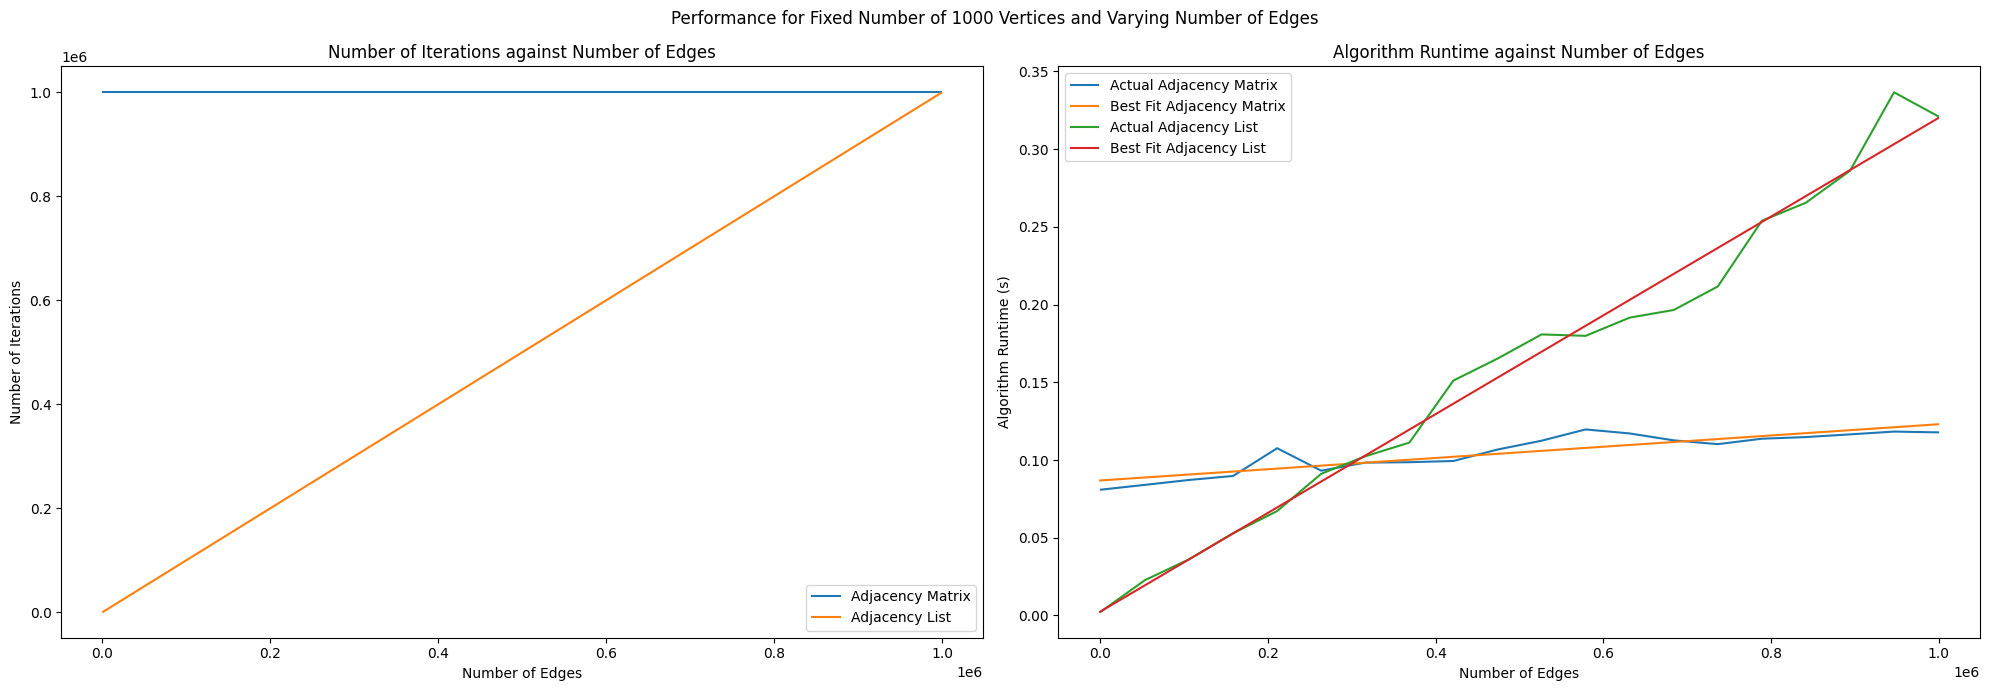

In [83]:
fig_1000, (ax1_1000, ax2_1000) = plotComparisons(edges_1000_adj_matrix_results, edges_1000_adj_list_results, 'Number of Edges', f'Performance for Fixed Number of {graph_vertices} Vertices and Varying Number of Edges', 1, 1);

# Adjacency Matrix VS Adjacency List
- Both matrix and list implementations increase in runtime exponentially with number of vertices and maximum number of edges
- Both implementations are good when applied in the right context
    - Adjacency Matrix
        - Better for dense graphs with many edges
        - Smaller changes in runtime with changes in number of edges
    - Adjacency List
        - Better for sparse graphs with fewer edges
        - Larger changes in runtime with changes in number of edges
- Intersection of performance is approximately where number of edges = 30% of maximum number of edges
    - If less than 30%, adjacency list is more efficient
    - If more than 30%, adjacency matrix is more efficient